In [1]:
# import 칸

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 함수 정의 칸

#array 안에 list의 값중 최소값만 저장하는 함수
def get_array_min(array):
    list_min = []
    for list in array:
        list_min.append(min(list))

    return list_min

# dimer energy list와 monomer energy list를 통해 total energy를 얻는 함수
def get_min_energy(dimer_energy_arr, monomer_energy_arr):
    total_energy = sum(dimer_energy_arr) - ((len(monomer_energy_arr) - 2) * sum(monomer_energy_arr))

    return total_energy

#위의 두 함수로 최소 total energy를 얻는 함수
def get_total_min_energy(dimer_energy_arr, monomer_energy_arr):
    
    dimer_min_arr = get_array_min(dimer_energy_arr)
    monomer_min_arr = get_array_min(monomer_energy_arr)

    total_min_energy = get_min_energy(dimer_energy_arr=dimer_min_arr, monomer_energy_arr=monomer_min_arr)

    return total_min_energy

# 기준값과 측정값을 가지고 에러와 에러율을 얻는 함수
def get_error_error_rate(exact, measured, show=True):
    error_rate = []
    error = []
    x_arr = [0.66, 0.75, 0.78, 0.94, 1.00]
    for i in range(len(exact)):
        error_gap = (measured[i]-exact[i])
        error.append(error_gap)
        rate = error_gap/exact[i]
        error_percent = 100- np.abs(rate * 100)
        error_rate.append(rate)
        if show:
            print("{0} error".format(x_arr[i]))
            print("오차  : {0}".format(error_gap))
            print("오차율: {0}".format(rate))
            print('오차율: {0}%'.format(error_percent))
            print("")

    return error, error_rate

### GAMESS LiCoO2 STO-3G CCSD energy data (bond distance)

In [3]:
gamess_sto3g_100_bond = -1521.3361541739
gamess_sto3g_094_bond = -1521.3442025182
gamess_sto3g_078_bond = -1521.3387007608
gamess_sto3g_075_bond = -1521.3345178559
gamess_sto3g_066_bond = -1521.3340138077

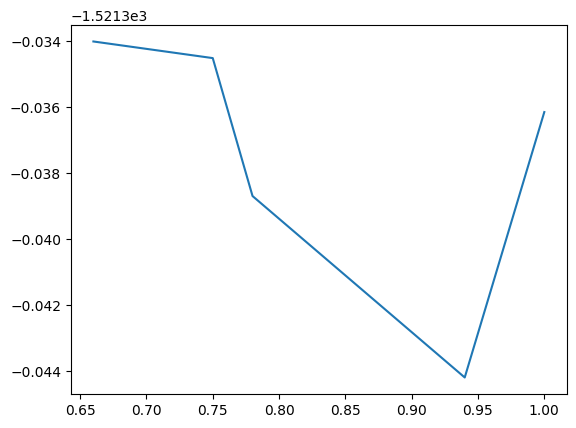

In [4]:
x = [0.66, 0.75, 0.78, 0.94, 1.00]
energy = [gamess_sto3g_066_bond,gamess_sto3g_075_bond, gamess_sto3g_078_bond, gamess_sto3g_094_bond, gamess_sto3g_100_bond]

plt.plot(x, energy)

### GAMESS LiCoO2 STO-3G CCSD energy data (avg. shortest distance)

Li와 O 사이의 거리를 avg. four shortest bond 기준으로 맞췄을때이다. 특별한 표시가 없으면 이 기준임.

In [5]:
gamess_sto3g_066 = -1521.3402831058
gamess_sto3g_075 = -1521.3407122868
gamess_sto3g_078 = -1521.3413581525
gamess_sto3g_094 = -1521.3388687492
gamess_sto3g_100 = -1521.3421009795


### GAMESS LiCoO2 STO-3G FCI energy data

In [6]:
gamess_sto3g_066_FCI = -1521.2491959476
gamess_sto3g_075_FCI = -1521.2488072122
gamess_sto3g_078_FCI = -1521.2478241899
gamess_sto3g_094_FCI = -1521.2444514641
gamess_sto3g_100_FCI = -1521.2443299884

### GAMESS LiCoO2 STO-3G FMO/VQE energy data

name = [UCCSD/COBLYA, UCCSD/SPSA, UCCSD/LBFGSB, TwoLocal/COBLYA, TwoLocal/SPSA, TwoLocal/LBFGSB]

#### monomer energy data

In [7]:
sto_Li = [-7.315525953,-7.315525981,-7.315525981,-7.315525969,-7.315430357,-7.315525981]
sto_O = [-73.80415023,	-73.80415023,	-73.80415023,	-73.80415023,	-73.80307421,	-73.80415023]
sto_Co = [-1365.94392,	-1366.002044,	-1366.118261,	-1366.006785,	-1365.740246,	-1366.092075]

monomer_arr = [sto_Li, sto_O, sto_O, sto_Co]

#### x=0.94 dimer energy data

In [8]:
sto_O_Li_Close_94 = [-81.07906594,	-81.07138161,	-81.08408496,	-81.01431545,	-81.04227163,	-81.08406026]
sto_O_Li_far_94 = [-81.11999178,	-81.119699,	-81.12007086,	-81.11775827,	-81.06677202,	-81.12007086]
sto_Co_Li_94 = [-1373.434678,	-1373.568648,	-1373.569509,	-1373.347301,	-1373.52901,	-1373.584236]
sto_O_O_94 = [-147.3919741,	-147.3743925,	-147.6080416,	-147.5517588,	-147.5235974,	-147.4899924]
sto_Co_O_d_94 = [-1439.423661,	-1439.843317,	-1439.952027,	-1439.16988,	-1439.485884,	-1439.803393]
sto_Co_O_s_94 = [-1439.393635,	-1439.48572,	-1439.898848,	-1439.210821,	-1439.564247,	-1439.986058]

sto_094_diemr_arr = [sto_O_Li_Close_94, sto_O_Li_far_94, sto_Co_Li_94, sto_O_O_94, sto_Co_O_d_94, sto_Co_O_s_94]

total_094_min_energy = get_total_min_energy(dimer_energy_arr=sto_094_diemr_arr, monomer_energy_arr=monomer_arr)
print(total_094_min_energy)


-1521.2503435380004


#### x=0.78 dimer energy data

In [9]:
sto_O_Li_Close_78 = [-81.0745880026353, -81.07629402430814, -81.08631021374744, -81.07068772124542, -81.02145154176911, -81.08629891522469]
sto_O_Li_far_78 = [-81.11832525583758, -81.11963702342047, -81.1200879854792, -81.09702540273388, -81.0584021246101, -81.11968444839437]
sto_Co_Li_78 = [-1373.2062397933382, -1373.3194795095255, -1373.3543289313343, -1373.5919945140838, -1373.3808906105648, -1373.7254918826993]
sto_O_O_78 = [-147.41212392467946, -147.55172565792464, -147.6070673118229, -147.5174072430343, -147.1667957060757, -147.5608226035143]
sto_Co_O_d_78 = [-1439.2260443970156, -1439.7783623546115, -1439.840046750559, -1439.3198492030026, -1439.523201976032, -1439.7148417355859]
sto_Co_O_s_78 = [-1439.5471789526177, -1439.8280324360035, -1439.9446881400029, -1439.3003091900675, -1439.4088563167393, -1439.7385469705264]

sto_078_diemr_arr = [sto_O_Li_Close_78, sto_O_Li_far_78, sto_Co_Li_78, sto_O_O_78, sto_Co_O_d_78, sto_Co_O_s_78]

total_078_min_energy = get_total_min_energy(dimer_energy_arr=sto_078_diemr_arr, monomer_energy_arr=monomer_arr)
print(total_078_min_energy)


-1521.2395174023104


In [10]:
sto_O_Li_Close_75 = [-81.06568206856633, -81.0814213352393, -81.08630953513286, -81.00311664619537, -81.02307002083222, -81.01220999537578]
sto_O_Li_far_75 = [-81.11982570870215, -81.12007363580996, -81.1200880609014, -81.09525734028007, -81.07190269921577, -81.12008761587381]
sto_Co_Li_75 = [-1373.2236598034447, -1373.3542564765162, -1373.3284629122354, -1373.5896808264117, -1373.585002651002, -1373.7905065493749]
sto_O_O_75 = [-147.41305266997352, -147.28126791317604, -147.60752566465803, -147.4458531075985, -147.44230722497315, -147.4629915461217]
sto_Co_O_d_75 = [-1439.2260443970156, -1439.7783623546115, -1439.840046750559, -1439.3198492030026, -1439.523201976032, -1439.7148417355859]
sto_Co_O_s_75 = [-1439.388347936008, -1439.7581777610744, -1439.8570749649068, -1439.3545107530401, -1439.4790015505437, -1439.7229983508892]

sto_075_diemr_arr = [sto_O_Li_Close_75, sto_O_Li_far_75, sto_Co_Li_75, sto_O_O_75, sto_Co_O_d_75, sto_Co_O_s_75]

total_075_min_energy = get_total_min_energy(dimer_energy_arr=sto_075_diemr_arr, monomer_energy_arr=monomer_arr)
print(total_075_min_energy)


-1521.2173766435326


### data summary

In [11]:
# 전체 데이터 정리

#아직 안나온 데이터
total_066_min_energy = total_075_min_energy
total_100_min_energy = total_075_min_energy
sto_total_lowest_energy = [total_066_min_energy, total_075_min_energy, total_078_min_energy, total_094_min_energy, total_100_min_energy]

sto_total_FCI_energy = [gamess_sto3g_066_FCI,
          gamess_sto3g_075_FCI, 
          gamess_sto3g_078_FCI, 
          gamess_sto3g_094_FCI,
          gamess_sto3g_100_FCI]

sto_total_CCSD_energy = [
          gamess_sto3g_066,
          gamess_sto3g_075, 
          gamess_sto3g_078, 
          gamess_sto3g_094, 
          gamess_sto3g_100]


#### Plot data

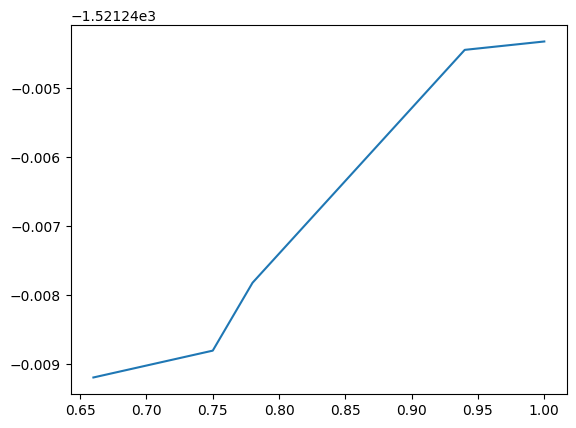

In [12]:
x = x = [0.66, 0.75, 0.78, 0.94, 1.00]
plt.plot(x, sto_total_FCI_energy)

In [13]:
import matplotlib.pyplot as plt


y_VQE = [-1521.16313325522, -1521.21737664353,-1521.23951740231,-1521.25034353800,-1521.20386830768]

In [14]:
diff=[]

FCI= np.array(sto_total_FCI_energy)
VQE= np.array(y_VQE)
CCSD = np.array(sto_total_CCSD_energy)

In [15]:
print(100 - np.abs(100*(VQE-FCI)/FCI))

[99.99434263 99.9979339  99.99945395 99.99961268 99.99734022]


In [16]:
print(100 - np.abs(100*(VQE-CCSD)/CCSD))

[99.98835567 99.99189296 99.99330586 99.9941811  99.99091377]


In [17]:
print(CCSD-VQE)

[-0.17714985 -0.12333564 -0.10184075 -0.08852521 -0.13823267]


In [18]:
sto_total_CCSD_energy

[-1521.3402831058,
 -1521.3407122868,
 -1521.3413581525,
 -1521.3388687492,
 -1521.3421009795]

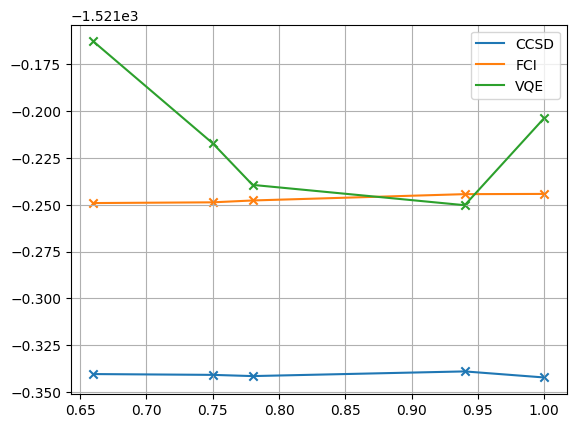

In [19]:
plt.plot(x, sto_total_CCSD_energy,label='CCSD')
plt.scatter(x, sto_total_CCSD_energy,marker='x')
plt.plot(x, sto_total_FCI_energy,label='FCI')
plt.scatter(x, sto_total_FCI_energy,marker='x')
plt.plot(x,y_VQE,label='VQE')
plt.scatter(x, y_VQE,marker='x')
plt.legend()
plt.grid()
plt.show()

In [23]:
error_FCI = VQE-FCI
error_CCSD = VQE-CCSD

accuracy_FCI = 100*(np.ones(5)-np.abs(error_FCI/FCI))
accuracy_CCSD =100*(np.ones(5)-np.abs(error_CCSD/CCSD))

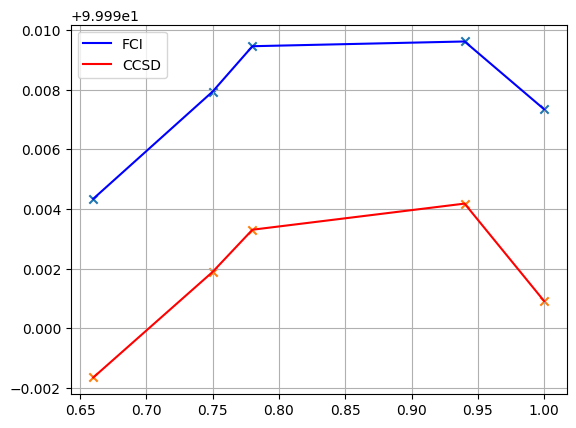

In [24]:
plt.plot(x, accuracy_FCI,label='FCI',color='blue')
plt.scatter(x, accuracy_FCI,marker='x')
plt.plot(x, accuracy_CCSD,label='CCSD',color='red')
plt.scatter(x, accuracy_CCSD,marker='x')
plt.legend()
plt.grid()
plt.show()

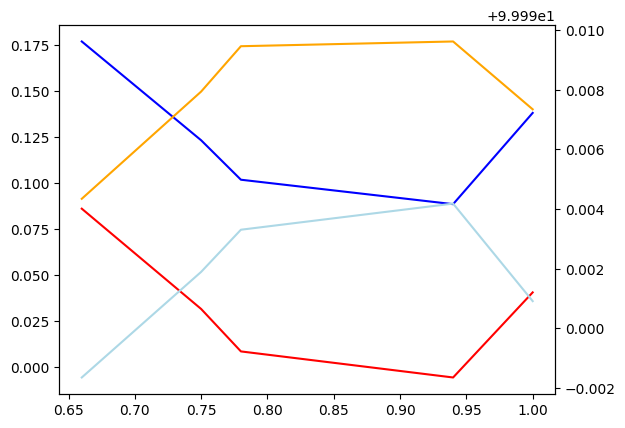

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(x, error_FCI,color='red')
ax1.plot(x, error_CCSD,color='blue')

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot(x, accuracy_FCI, color='orange' )
ax2.plot(x, accuracy_CCSD, color='lightblue' )
plt.show()

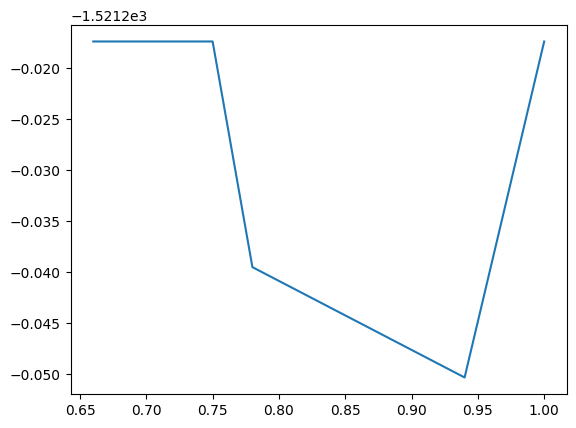

In [ ]:
plt.plot(x, sto_total_lowest_energy)

### Error, Error rate

#### exact = FCI, measured = FMO/VQE

In [ ]:
FCI_FMO_error_rate = get_error_error_rate(exact=sto_total_FCI_energy, measured=sto_total_lowest_energy)

0.66 error
오차  : 0.03181930406731226
오차율: -2.0916562619769686e-05
오차율: 99.99790834373802%

0.75 error
오차  : 0.03143056866747429
오차율: -2.066103093620373e-05
오차율: 99.99793389690637%

0.78 error
오차  : 0.00830678758961767
오차율: -5.460509101494511e-06
오차율: 99.99945394908985%

0.94 error
오차  : -0.005892073900440664
오차율: 3.873193354802328e-06
오차율: 99.99961268066453%

1.0 error
오차  : 0.026953344867479245
오차율: -1.7717959131315067e-05
오차율: 99.99822820408687%



#### exact = CCSD, measured = FMO/VQE

In [ ]:
CCSD_FMO_error_rate = get_error_error_rate(exact=sto_total_CCSD_energy, measured=sto_total_lowest_energy)

0.66 error
오차  : 0.1229064622673377
오차율: -8.078827835704546e-05
오차율: 99.9919211721643%

0.75 error
오차  : 0.12333564326740998
오차율: -8.107036265533069e-05
오차율: 99.99189296373447%

0.78 error
오차  : 0.10184075018969452
오차율: -6.694141958604792e-05
오차율: 99.9933058580414%

0.94 error
오차  : 0.08852521119956691
오차율: -5.818901562171335e-05
오차율: 99.99418109843783%

1.0 error
오차  : 0.12472433596735755
오차율: -8.198309629836386e-05
오차율: 99.99180169037017%



#### exact = FCI, measured = CCSD

In [ ]:
FCI_CCSD_error_rate = get_error_error_rate(exact=sto_total_FCI_energy, measured=sto_total_CCSD_energy)

0.66 error
오차  : -0.09108715820002544
오차율: 5.9876553060911515e-05
오차율: 99.99401234469391%

0.75 error
오차  : -0.09190507459993569
오차율: 6.04142295226239e-05
오차율: 99.99395857704774%

0.78 error
오차  : -0.09353396260007685
오차율: 6.148502637950254e-05
오차율: 99.99385149736204%

0.94 error
오차  : -0.09441728510000758
오차율: 6.206582052551581e-05
오차율: 99.99379341794744%

1.0 error
오차  : -0.0977709910998783
오차율: 6.427040625395385e-05
오차율: 99.9935729593746%

